In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Predict Hair Fall.csv')

In [ ]:
df.drop(columns=['Id'],inplace=True)
df.head()

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [ ]:
df.shape

(999, 12)

In [ ]:
df.describe(include=[object])

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss
count,999,999,999,999,999,999,999,999,999,999
unique,2,2,11,11,11,3,2,2,2,2
top,Yes,Yes,No Data,Rogaine,Zinc Deficiency,Moderate,No,Yes,Yes,No
freq,522,509,110,116,108,351,507,508,519,527


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Genetics                   999 non-null    object
 1   Hormonal Changes           999 non-null    object
 2   Medical Conditions         999 non-null    object
 3   Medications & Treatments   999 non-null    object
 4   Nutritional Deficiencies   999 non-null    object
 5   Stress                     999 non-null    object
 6   Age                        999 non-null    int64 
 7   Poor Hair Care Habits      999 non-null    object
 8   Environmental Factors      999 non-null    object
 9   Smoking                    999 non-null    object
 10  Weight Loss                999 non-null    object
 11  Hair Loss                  999 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 93.8+ KB


In [ ]:
df.isna().sum()

Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Getting unique values in each column
unique_values = {col: df[col].unique().tolist() for col in df.columns}
unique_values

{'Genetics': ['Yes', 'No'],
 'Hormonal Changes': ['No', 'Yes'],
 'Medical Conditions': ['No Data',
  'Eczema',
  'Dermatosis',
  'Ringworm',
  'Psoriasis',
  'Alopecia Areata ',
  'Scalp Infection',
  'Seborrheic Dermatitis',
  'Dermatitis',
  'Thyroid Problems',
  'Androgenetic Alopecia'],
 'Medications & Treatments': ['No Data',
  'Antibiotics',
  'Antifungal Cream',
  'Accutane',
  'Chemotherapy',
  'Steroids',
  'Rogaine',
  'Blood Pressure Medication',
  'Immunomodulators',
  'Antidepressants ',
  'Heart Medication '],
 'Nutritional Deficiencies ': ['Magnesium deficiency',
  'Protein deficiency',
  'Biotin Deficiency ',
  'Iron deficiency',
  'Selenium deficiency',
  'Omega-3 fatty acids',
  'Zinc Deficiency',
  'Vitamin A Deficiency',
  'Vitamin D Deficiency',
  'No Data',
  'Vitamin E deficiency'],
 'Stress': ['Moderate', 'High', 'Low'],
 'Age': [19,
  43,
  26,
  46,
  30,
  37,
  40,
  35,
  49,
  48,
  20,
  34,
  29,
  33,
  28,
  41,
  21,
  22,
  45,
  24,
  31,
  39,
  38

In [ ]:
# Replacing values as specified
df['Medications & Treatments'] = df['Medications & Treatments'].replace('No Data', 'No Medical Treatments')
df['Nutritional Deficiencies '] = df['Nutritional Deficiencies '].replace('No Data', 'No Nutritional Deficiencies')
df['Medical Conditions'] = df['Medical Conditions'].replace('No Data', 'No medical problem')

In [ ]:
df.nunique()

Genetics                      2
Hormonal Changes              2
Medical Conditions           11
Medications & Treatments     11
Nutritional Deficiencies     11
Stress                        3
Age                          33
Poor Hair Care Habits         2
Environmental Factors         2
Smoking                       2
Weight Loss                   2
Hair Loss                     2
dtype: int64

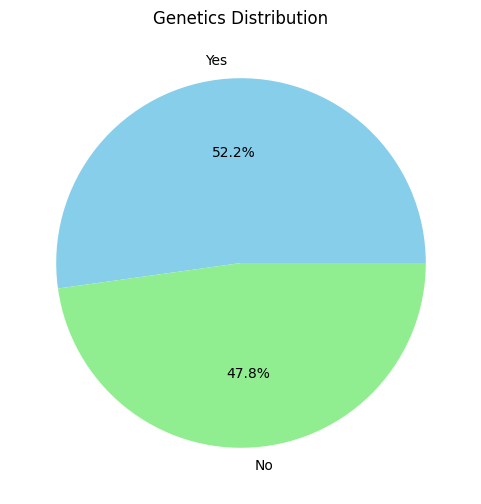

In [ ]:
# Pie chart for Genetics
plt.figure(figsize=(6, 6))
df['Genetics'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Genetics Distribution')
plt.ylabel('')
plt.show()

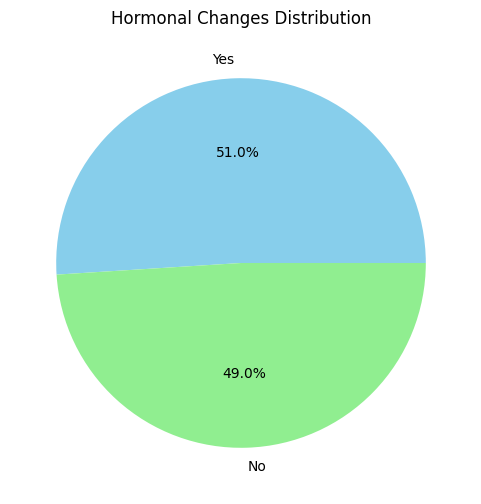

In [ ]:
# Pie chart for Hormonal Changes
plt.figure(figsize=(6, 6))
df['Hormonal Changes'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Hormonal Changes Distribution')
plt.ylabel('')
plt.show()

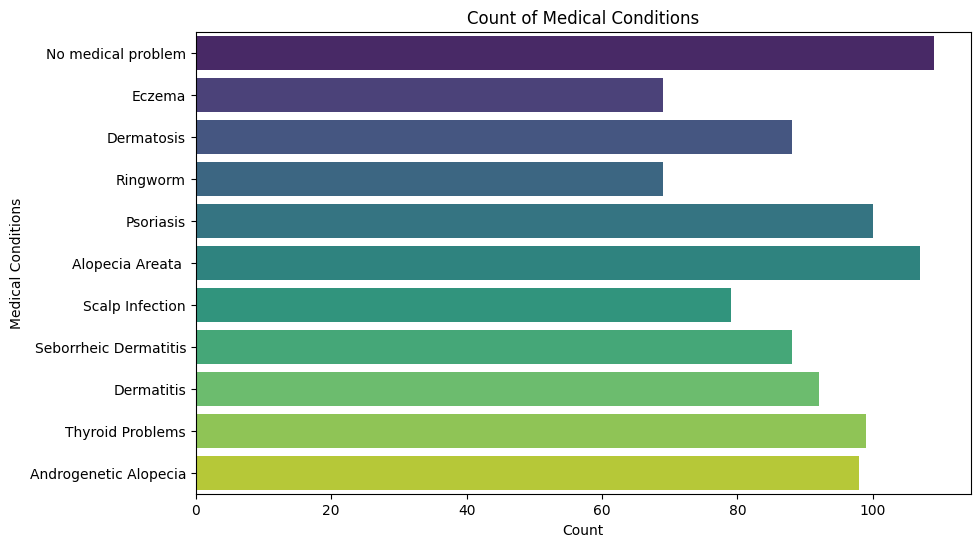

In [ ]:
# Count plot for Medical Conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='Medical Conditions', data=df, palette='viridis')
plt.title('Count of Medical Conditions')
plt.xlabel('Count')
plt.ylabel('Medical Conditions')
plt.show()

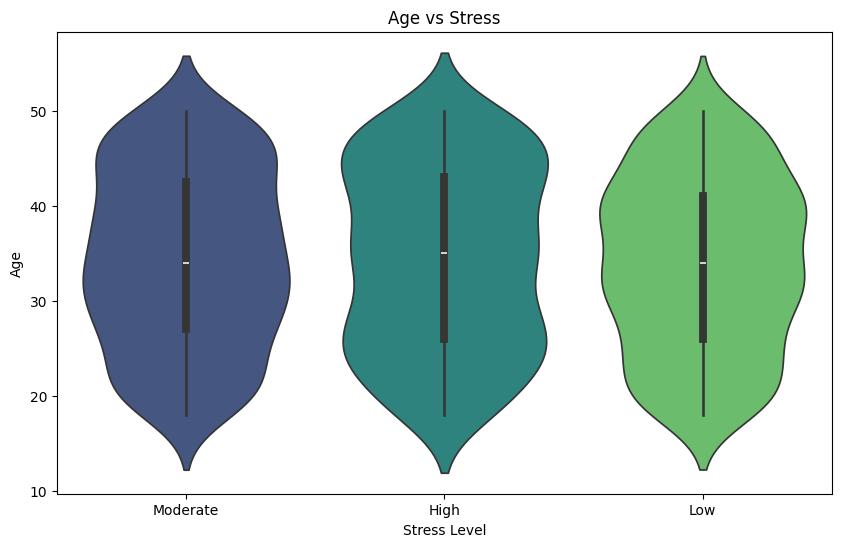

In [ ]:
# Violin plot for Age vs Stress
plt.figure(figsize=(10, 6))
sns.violinplot(x='Stress', y='Age', data=df, palette='viridis')
plt.title('Age vs Stress')
plt.xlabel('Stress Level')
plt.ylabel('Age')
plt.show()

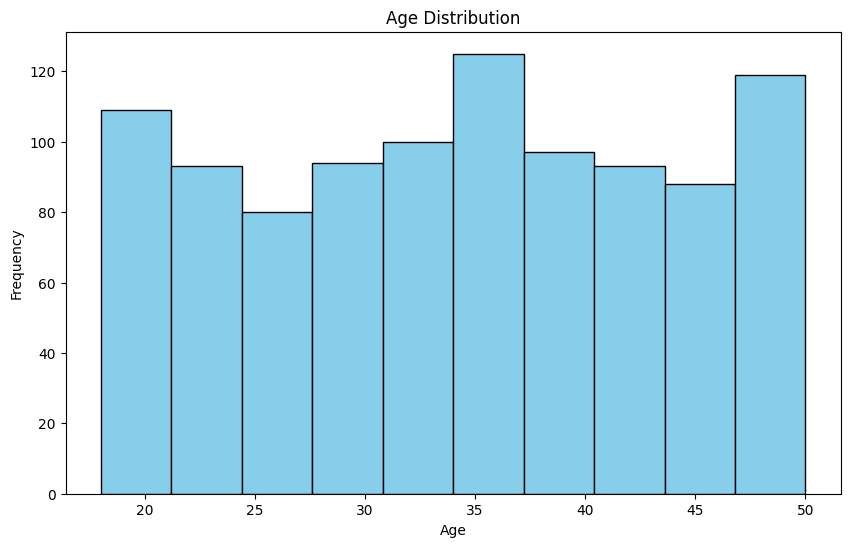

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
df['Age'].plot.hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

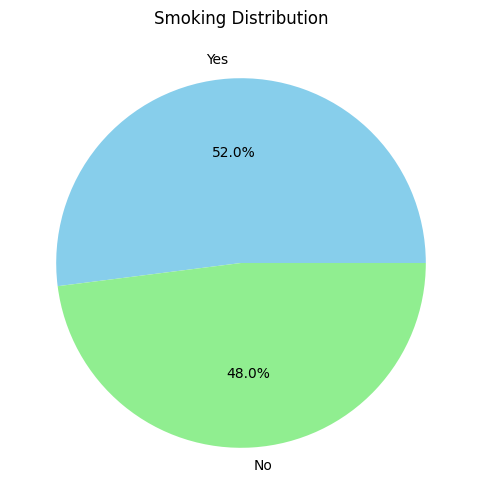

In [ ]:
# Pie chart for Smoking
plt.figure(figsize=(6, 6))
df['Smoking'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Smoking Distribution')
plt.ylabel('')
plt.show()

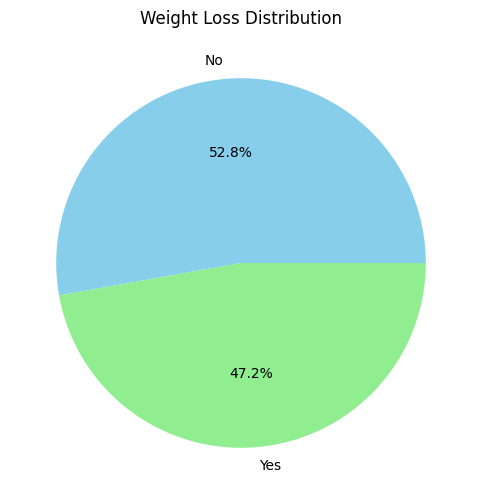

In [ ]:
# Pie chart for Weight Loss
plt.figure(figsize=(6, 6))
df['Weight Loss '].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Weight Loss Distribution')
plt.ylabel('')
plt.show()

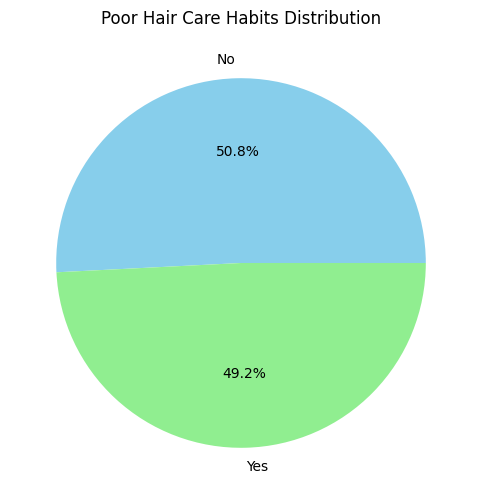

In [ ]:
# Pie chart for Poor Hair Care Habits
plt.figure(figsize=(6, 6))
df['Poor Hair Care Habits '].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Poor Hair Care Habits Distribution')
plt.ylabel('')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'Genetics', 'Hormonal Changes', 'Medical Conditions',
    'Medications & Treatments', 'Nutritional Deficiencies ',
    'Stress', 'Poor Hair Care Habits ', 'Environmental Factors',
    'Smoking', 'Weight Loss '
]

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

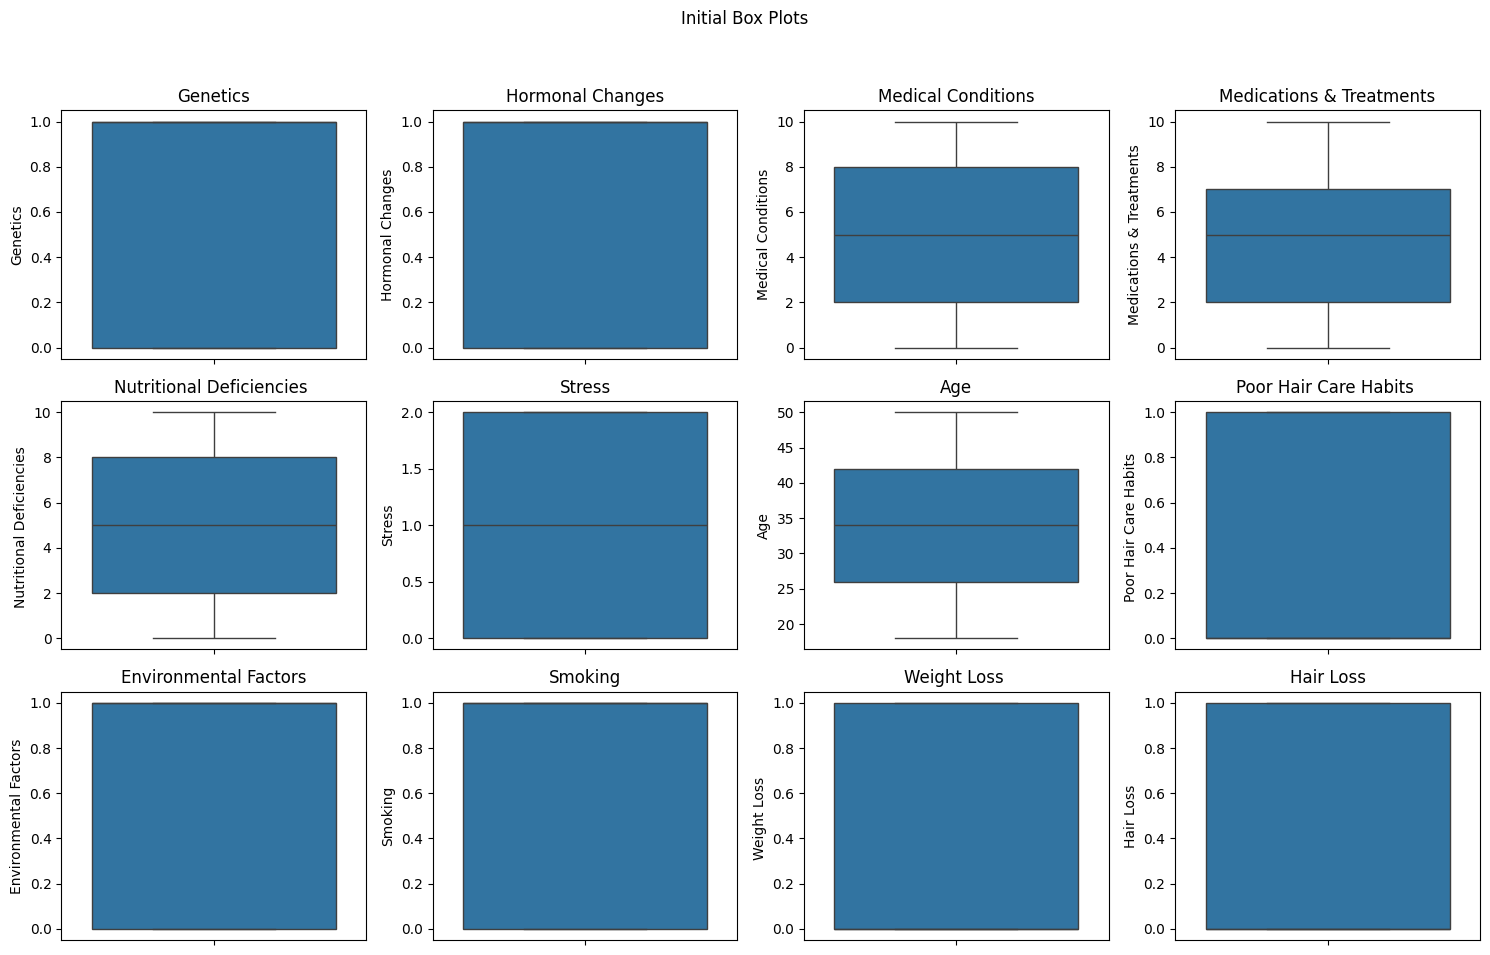

In [ ]:
# Define a function to plot box plots for each numerical column
def plot_box_plots(df, title):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot initial box plots
plot_box_plots(df, 'Initial Box Plots')

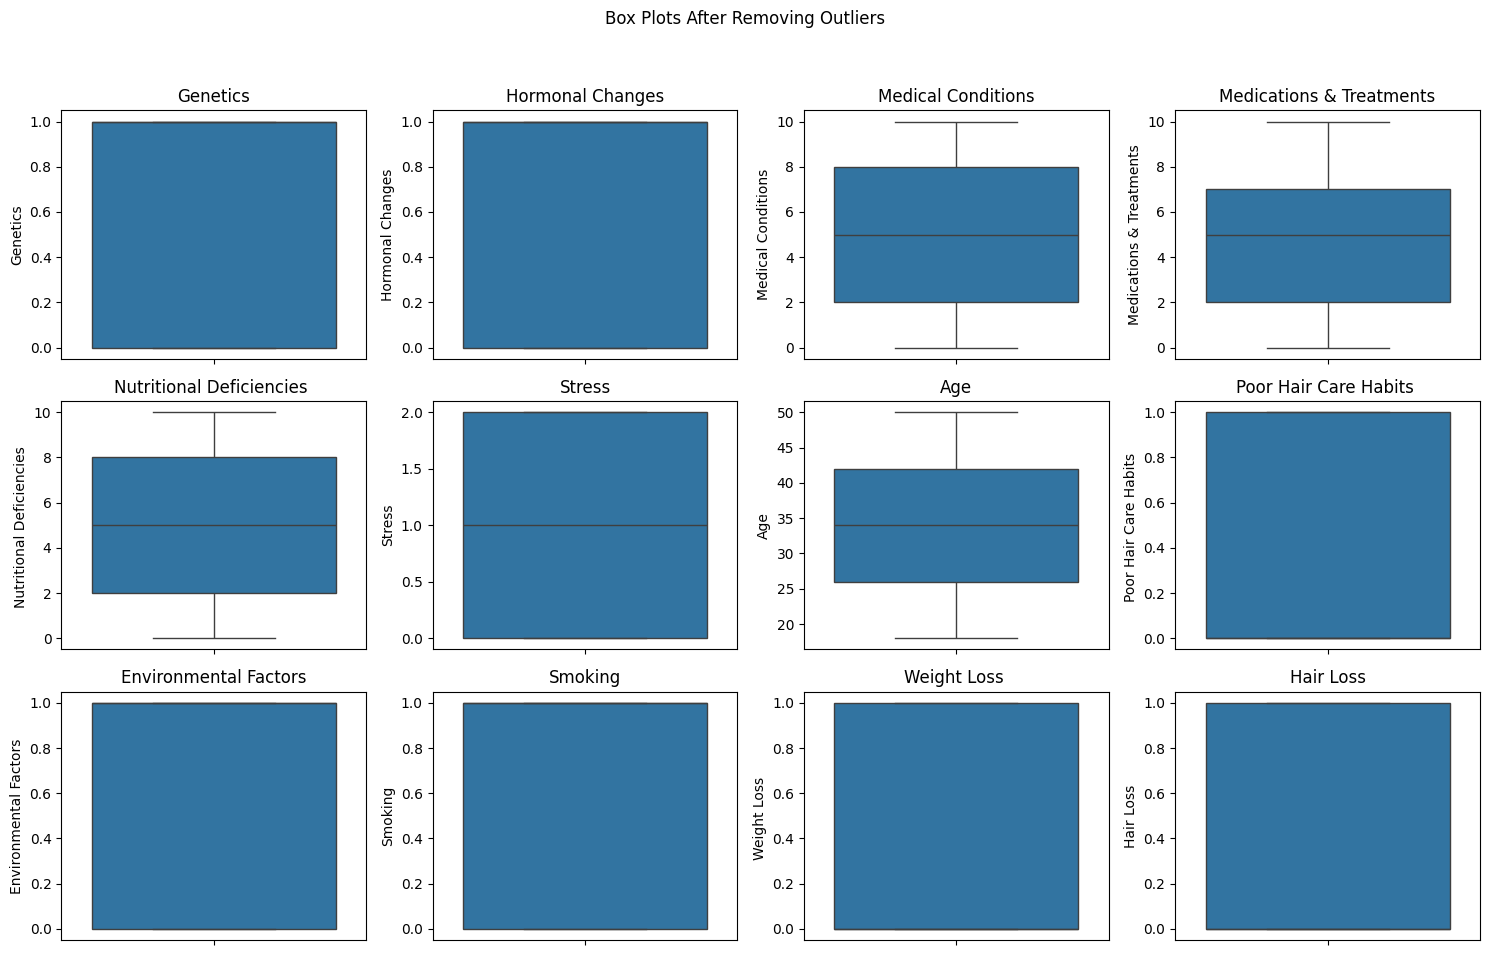

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_no_outliers = remove_outliers(df)

# Plot box plots after removing outliers
plot_box_plots(df_no_outliers, 'Box Plots After Removing Outliers')


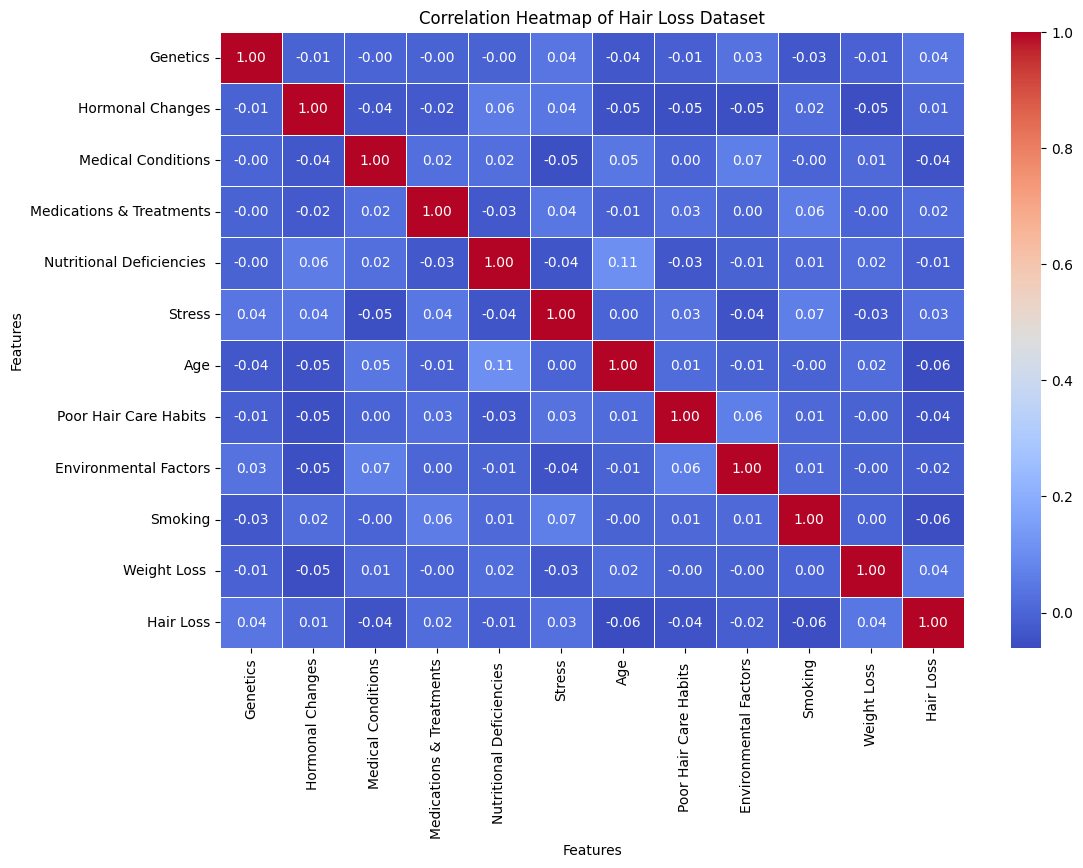

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Hair Loss Dataset')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

# **Random Forest**

Accuracy: 0.52
Precision: 0.55
Recall: 0.45
F1 Score: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.61      0.55       145
           1       0.55      0.45      0.49       155

    accuracy                           0.52       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.53      0.52      0.52       300



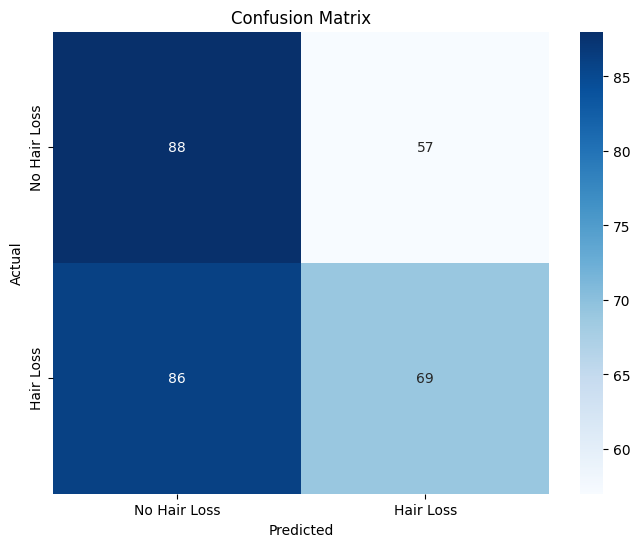

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Split the dataset into features and target
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hair Loss', 'Hair Loss'], yticklabels=['No Hair Loss', 'Hair Loss'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **XGBOOST**

Accuracy: 0.53
Precision: 0.55
Recall: 0.50
F1 Score: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       145
           1       0.55      0.50      0.52       155

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300



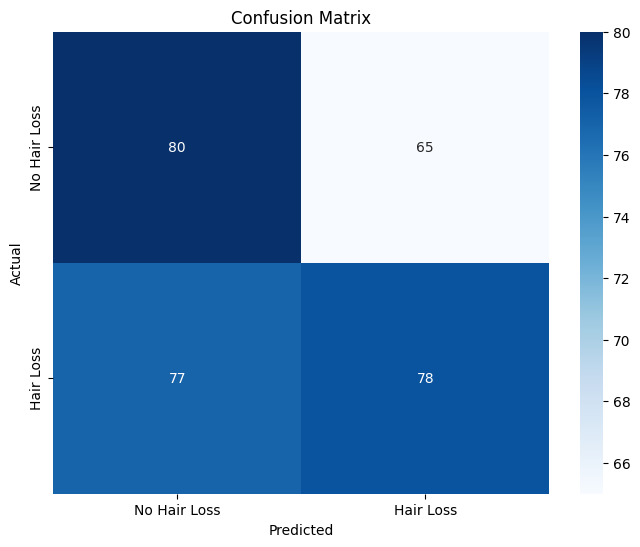

In [ ]:
import xgboost as xgb

# Split the dataset into features and target
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hair Loss', 'Hair Loss'], yticklabels=['No Hair Loss', 'Hair Loss'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **GBM**

Accuracy: 0.52
Precision: 0.54
Recall: 0.52
F1 Score: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       145
           1       0.54      0.52      0.53       155

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



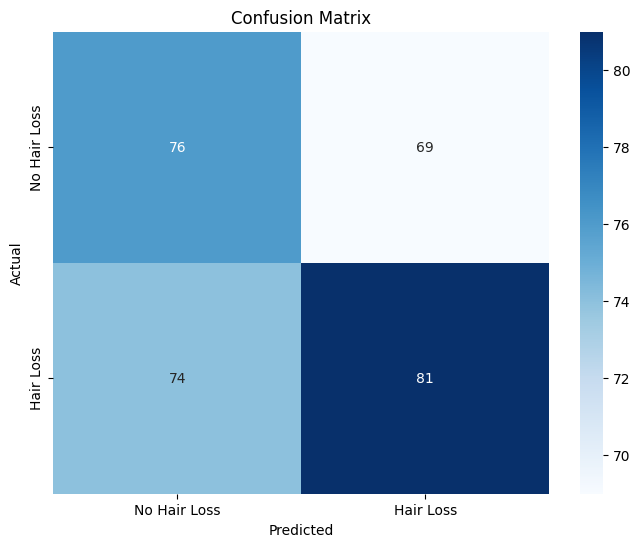

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the dataset into features and target
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hair Loss', 'Hair Loss'], yticklabels=['No Hair Loss', 'Hair Loss'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **KNN**

Accuracy: 0.52
Precision: 0.54
Recall: 0.54
F1 Score: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       145
           1       0.54      0.54      0.54       155

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



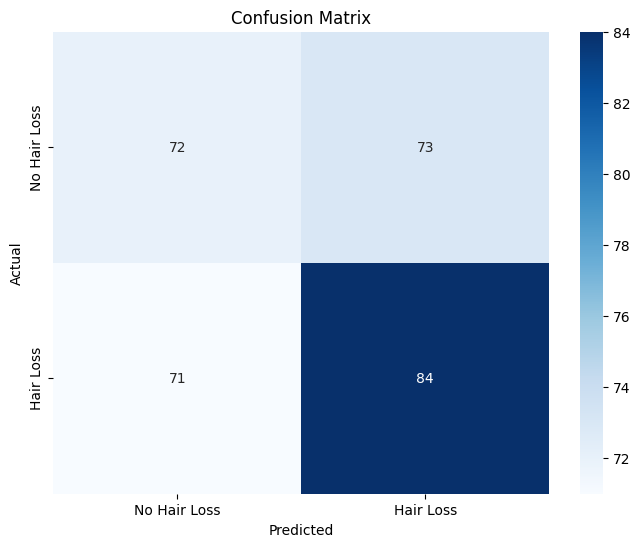

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hair Loss', 'Hair Loss'], yticklabels=['No Hair Loss', 'Hair Loss'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.58
Precision: 0.61
Recall: 0.52
F1 Score: 0.56

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       145
           1       0.61      0.52      0.56       155

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300



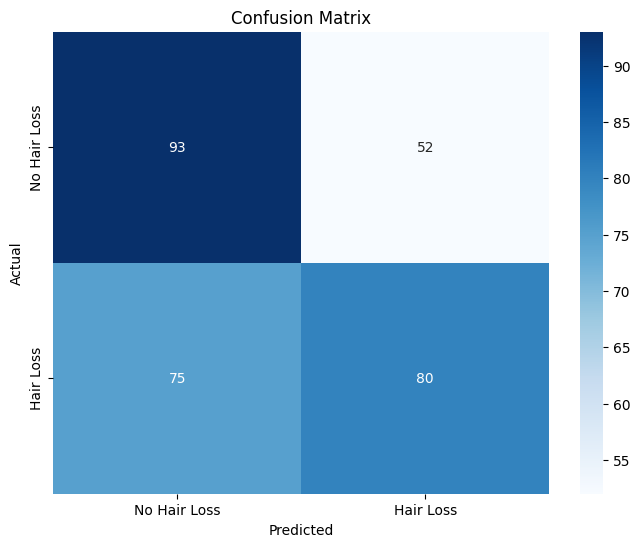

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Split the dataset into features and target
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hair Loss', 'Hair Loss'], yticklabels=['No Hair Loss', 'Hair Loss'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **MODEL COMPARISON**

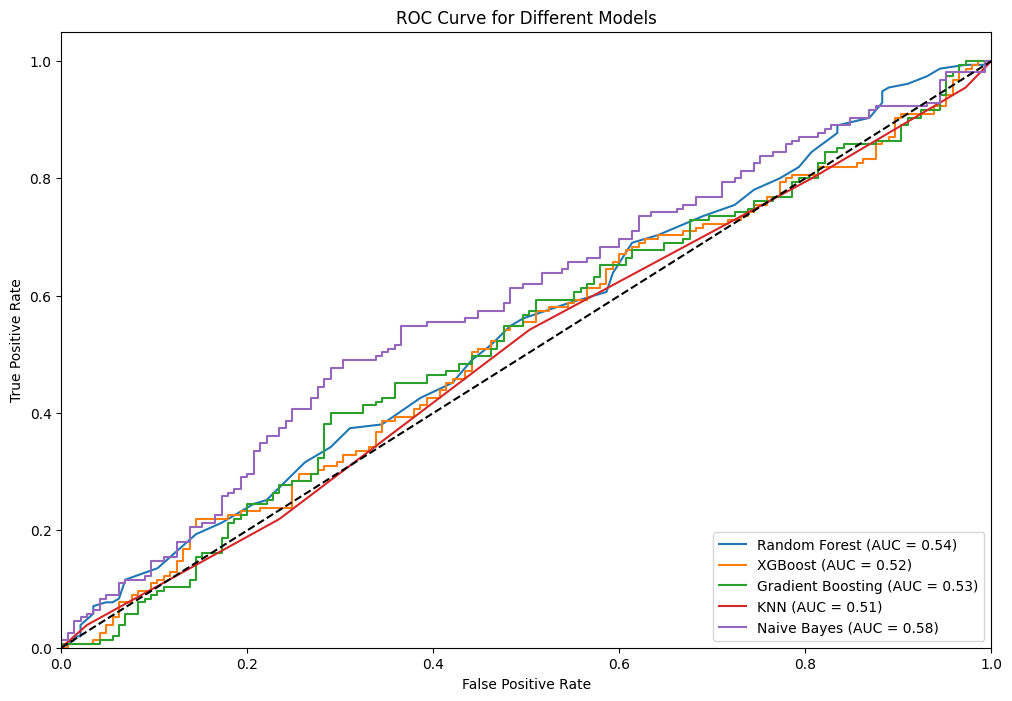

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Plot ROC Curve for each model
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

# **CROSS VALIDATION**

Accuracy for each fold:
Fold 1: 0.57
Fold 2: 0.53
Fold 3: 0.60
Fold 4: 0.52
Fold 5: 0.49
Fold 6: 0.44
Fold 7: 0.49
Fold 8: 0.53
Fold 9: 0.48
Fold 10: 0.56

Average Accuracy: 0.52


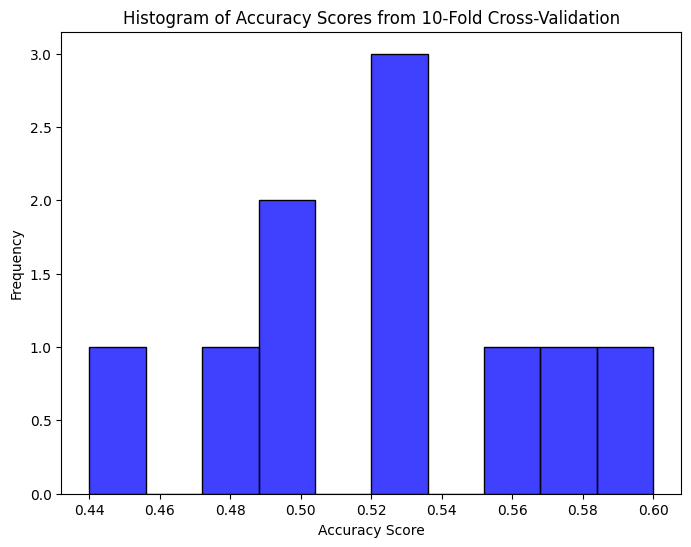

In [ ]:
from sklearn.model_selection import  cross_val_score
from sklearn.naive_bayes import GaussianNB

# Perform 10-fold cross-validation
cv_scores = cross_val_score(nb_model, X, y, cv=10, scoring='accuracy')

# Print accuracy for each fold
print("Accuracy for each fold:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Print average accuracy
average_accuracy = cv_scores.mean()
print(f"\nAverage Accuracy: {average_accuracy:.2f}")

# Plot histogram of accuracy scores
plt.figure(figsize=(8, 6))
sns.histplot(cv_scores, bins=10, color='blue', edgecolor='black', kde=False)
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy Scores from 10-Fold Cross-Validation')
plt.show()


In [ ]:
import pickle
# Save the trained model using pickle
model_filename = 'naive_bayes_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(nb_model, file)

In [ ]:
# Load the trained Naive Bayes model
model_filename = 'naive_bayes_model.pkl'
with open(model_filename, 'rb') as file:
    nb_model = pickle.load(file)

# Define unique values for encoding
unique_values = {
    'Genetics': ['Yes', 'No'],
    'Hormonal Changes': ['No', 'Yes'],
    'Medical Conditions': ['No medical problem',
                            'Eczema',
                            'Dermatosis',
                            'Ringworm',
                            'Psoriasis',
                            'Alopecia Areata ',
                            'Scalp Infection',
                            'Seborrheic Dermatitis',
                            'Dermatitis',
                            'Thyroid Problems',
                            'Androgenetic Alopecia'],
    'Medications & Treatments': ['No Medications & Treatments',
                                 'Antibiotics',
                                 'Antifungal Cream',
                                 'Accutane',
                                 'Chemotherapy',
                                 'Steroids',
                                 'Rogaine',
                                 'Blood Pressure Medication',
                                 'Immunomodulators',
                                 'Antidepressants ',
                                 'Heart Medication '],
    'Nutritional Deficiencies ': ['Magnesium deficiency',
                                  'Protein deficiency',
                                  'Biotin Deficiency ',
                                  'Iron deficiency',
                                  'Selenium deficiency',
                                  'Omega-3 fatty acids',
                                  'Zinc Deficiency',
                                  'Vitamin A Deficiency',
                                  'Vitamin D Deficiency',
                                  'No Nutritional Deficiencies',
                                  'Vitamin E deficiency'],
    'Stress': ['Moderate', 'High', 'Low'],
    'Age': [19, 43, 26, 46, 30, 37, 40, 35, 49, 48, 20, 34, 29, 33, 28, 41, 21, 22, 45, 24, 31, 39, 38, 36, 18, 44, 50, 27, 25, 23, 47, 32, 42],
    'Poor Hair Care Habits ': ['Yes', 'No'],
    'Environmental Factors': ['Yes', 'No'],
    'Smoking': ['No', 'Yes'],
    'Weight Loss ': ['No', 'Yes']
}

# Define a function to encode user input
def encode_input(user_input):
    encoded_input = {}
    for feature, value in user_input.items():
        if feature in unique_values:
            le = LabelEncoder()
            le.fit(unique_values[feature])
            encoded_input[feature] = le.transform([value])[0]
        elif feature == 'Age':
            encoded_input[feature] = value
    return encoded_input

# Define a function to predict hair loss
def predict_hair_loss(user_input):
    # Encode the user input
    encoded_input = encode_input(user_input)

    # Convert to DataFrame for prediction
    df_input = pd.DataFrame([encoded_input])

    # Scale features
    scaler = StandardScaler()
    df_input_scaled = scaler.fit_transform(df_input)

    # Predict using the loaded model
    prediction = nb_model.predict(df_input_scaled)

    # Interpret the prediction
    if prediction[0] == 1:
        return "You are Bald. You have a hair loss problem."
    else:
        return "You are Not Bald. You do not have a hair loss problem."

# Collect user input
def get_user_input():
    print("Please enter the following details:")
    user_input = {
        'Genetics': input("Genetics (Yes/No): "),
        'Hormonal Changes': input("Hormonal Changes (Yes/No): "),
        'Medical Conditions': input("Medical Conditions: "),
        'Medications & Treatments': input("Medications & Treatments: "),
        'Nutritional Deficiencies ': input("Nutritional Deficiencies: "),
        'Stress': input("Stress (Moderate/High/Low): "),
        'Age': int(input("Age: ")),
        'Poor Hair Care Habits ': input("Poor Hair Care Habits (Yes/No): "),
        'Environmental Factors': input("Environmental Factors (Yes/No): "),
        'Smoking': input("Smoking (Yes/No): "),
        'Weight Loss ': input("Weight Loss (Yes/No): ")
    }
    return user_input

# Main function
if __name__ == "__main__":
    user_input = get_user_input()
    result = predict_hair_loss(user_input)
    print(result)


Please enter the following details:
Genetics (Yes/No): Yes
Hormonal Changes (Yes/No): Yes
Medical Conditions: Eczema
Medications & Treatments: Antibiotics
Nutritional Deficiencies: Magnesium deficiency
Stress (Moderate/High/Low): Low
Age: 21
Poor Hair Care Habits (Yes/No): Yes
Environmental Factors (Yes/No): Yes
Smoking (Yes/No): Yes
Weight Loss (Yes/No): Yes
You are Not Bald. You do not have a hair loss problem.
